## Handling ImbalanceData

1)  Oversampling

2)  Undersampling

3)  SMOTE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## np array
random = np.random.randint(low = 0 , high = 100 , size = 1000)
name = np.random.choice([1,2,3,4,5],size = 1000)
choice = np.random.choice([11,12,13,14,15],size = 1000)
y1 = np.random.choice([1,1],size = 900)
y2 = np.random.choice([0,0],size = 100)
y = np.concatenate((y1,y2))

#creating dictionary
dict1 = {
    'Random':random, 
    'Name':name,
    'Choice':choice,
    'Y': y
}

#creating dataframe
df = pd.DataFrame(dict1)
df



,Random,Name,Choice,Y
0,25,4,15,1
1,71,4,13,1
2,46,3,13,1
3,6,5,13,1
4,63,2,11,1
...,...,...,...,...
995,10,3,11,0
996,13,1,15,0
997,78,5,13,0
998,6,1,15,0


In [3]:
x = df['Y'].value_counts()

# printing the values
print(x)

1    900
0    100
Name: Y, dtype: int64


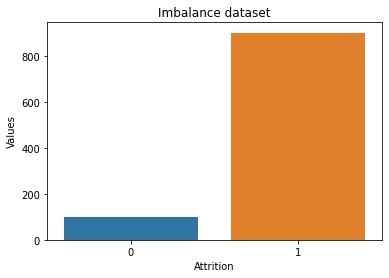

In [4]:
import seaborn as sns
sns.countplot(x= "Y" , data = df)
plt.title('Imbalance dataset', fontsize = 12)
plt.xlabel('Attrition')
plt.ylabel('Values')
plt.show()

### Separating majority and minority classes


In [5]:
from sklearn.utils import resample

#separating majority and minority classes
df_majority = df[df.Y == 1]
df_minority = df[df.Y == 0]

### Downsampling majority class


In [6]:
#Upsampling minority class

df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=100,    # to match minority class
                                 random_state=111) 



In [7]:
#combining majority classes with upsampled minority class

df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled.shape

(200, 4)

### Upsampling minority class


In [8]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=900,    # to match majority class
                                 random_state=123) 

#combining majority classes with upsampled minority class

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.shape

(1800, 4)

### SMOTE :Synthetic Minority Oversampling Technique


In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
X_train = df.iloc[:,0:3]
y_train = df.iloc[:,3:]

In [11]:
sm = SMOTE(random_state=2)

X_smote,y_smote=sm.fit_resample(X_train,y_train)

In [12]:
X_train.shape, y_train.shape

((1000, 3), (1000, 1))

In [13]:
X_smote.shape , y_smote.shape

((1800, 3), (1800, 1))